In [2]:
import sklearn
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import random
data_path = "../data/raw"
train_path = f"{data_path}/train"
val_path = f"{data_path}/val"
test_path = f"{data_path}/test"



(930, 655)


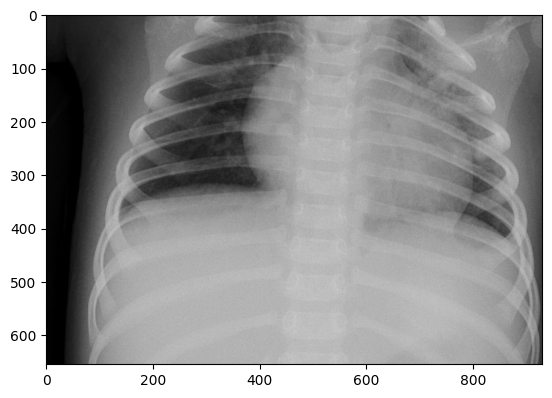

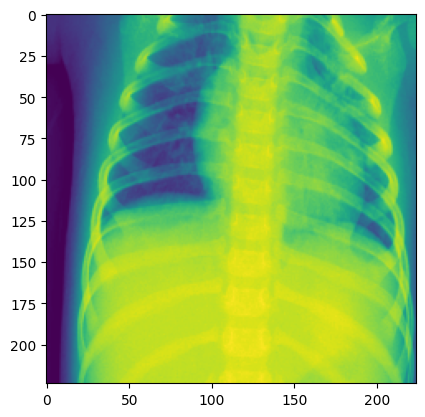

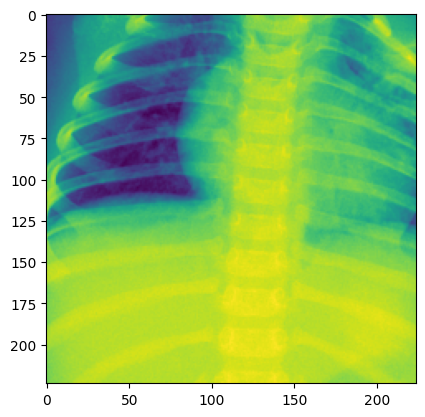

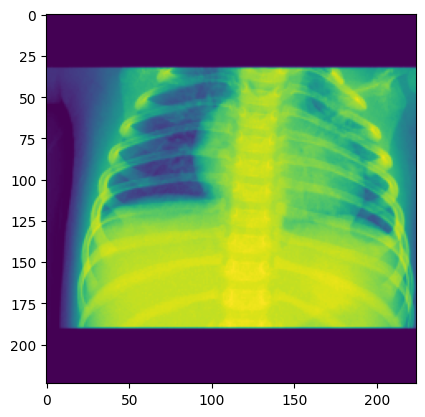

In [6]:
import torchvision
from torchvision import transforms
import torch
train_files = os.listdir(f"{train_path}/PNEUMONIA")
img = Image.open(f'{train_path}/PNEUMONIA/{train_files[0]}')
plt.imshow(img)
print(img.size)
plt.figure()

def square_pad(img):
    w,h = img.size
    max_side = max(w,h)
    horip = (max_side-w)//2
    verticalp = (max_side-h)//2
    img = transforms.functional.pad(img,(horip,verticalp,max_side-w-horip,max_side-h-verticalp),fill=0,padding_mode="constant")
    return img
    

transform_resize_only = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Grayscale(),
     transforms.Resize((224,224)),
     transforms.ToPILImage()])

transform_center_crop = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Grayscale(),
     transforms.Resize(224),
     transforms.CenterCrop(224),
     transforms.ToPILImage()])

## Uses padding to retain information in image, we hope to get the best performances
transform_padding = transforms.Compose(
    [transforms.Lambda(square_pad),
     transforms.ToTensor(),
     transforms.Grayscale(),
     transforms.Resize(224),
     
     transforms.ToPILImage()])


plt.imshow(transform_resize_only(img))
plt.figure()
plt.imshow(transform_center_crop(img))
plt.figure()
plt.imshow(transform_padding(img))


In [2]:
def is_image_corrupted(file_path):
    try:
        with Image.open(file_path) as img:
            img.verify()
        return False
    except Exception as e:
        print(f"File is corrupted : {file_path} - {e}")
        return True

count = 0
for data_set in [train_path,val_path,test_path]:
    
    for c in os.listdir(data_set):
        folder = os.path.join(data_set,c)
        for im_path in os.listdir(folder):
            is_image_corrupted(os.path.join(folder,im_path))
            count+=1

print(f"All {count} images were checked for possible corruption.")


All 5856 images were checked for possible corruption.


In [3]:
# Dimension check
img_path = f"{train_path}/NORMAL/IM-0115-0001.jpeg"
sizes = []
for data_set in [train_path,val_path,test_path]:
    for c in os.listdir(data_set):
        folder = os.path.join(data_set,c)
        for im_path in os.listdir(folder):
            img = Image.open(os.path.join(folder,im_path))
            size = img.size
            if(size not in sizes):
                sizes.append(size)

print(f"There are {len(sizes)} different image sizes in our dataset.")


There are 4803 different image sizes in our dataset.


In [4]:
img_path = f"{train_path}/NORMAL/IM-0115-0001.jpeg"
modes = []
for data_set in [train_path,val_path,test_path]:
    for c in os.listdir(data_set):
        folder = os.path.join(data_set,c)
        for im_path in os.listdir(folder):
            img = Image.open(os.path.join(folder,im_path))
            mode = img.mode
            if(mode not in modes):
                modes.append(mode)

print(f"Here are the various modes of our images : {np.unique(modes)}")

for data_set in [train_path,val_path,test_path]:
    for c in os.listdir(data_set):
        folder = os.path.join(data_set,c)
        for im_path in os.listdir(folder):
            img = Image.open(os.path.join(folder,im_path))
            mode = img.mode
            if mode == "RGB":
                plt.imshow(img) 

# We have only one RGB image which can be converted to grayscale (L) easily

Here are the various modes of our images : ['L' 'RGB']
Error in callback <function flush_figures at 0x7a52cfd9ff40> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [13]:
def plot_random_images(data_set,n):
    classe = "NORMAL"
    images = []
    labels = []
    for i in range(n):
        img_path = random.choice(os.listdir(os.path.join(data_set,classe)))
        labels.append(classe)
        images.append(Image.open(os.path.join(os.path.join(data_set,classe),img_path)))
        if(classe == "NORMAL"):
            classe = "PNEUMONIA"
        else:
            classe = "NORMAL"

        

In [14]:
count = 0
count_normal = 0
count_pneumonia = 0
normals = {train_path:0,val_path:0,test_path:0}
pneumonias = {train_path:0,val_path:0,test_path:0}
for data_set in [train_path,val_path,test_path]:
    
    for c in os.listdir(data_set):
        folder = os.path.join(data_set,c)
        for im_path in os.listdir(folder):
            is_image_corrupted(os.path.join(folder,im_path))
            count+=1
            if(c == "NORMAL"):
                count_normal +=1
                normals[data_set]+=1
            else:
                count_pneumonia+=1
                pneumonias[data_set]+=1


print(f"{count_normal/count}")

print(f"{count_pneumonia/count}")

for d in [train_path,val_path,test_path]:
    print(f"normal : {normals[d]/(normals[d]+pneumonias[d])}")
    print(f"pneumonia : {pneumonias[d]/(normals[d]+pneumonias[d])}")




0.2703210382513661
0.7296789617486339
normal : 0.2570935582822086
pneumonia : 0.7429064417177914
normal : 0.5
pneumonia : 0.5
normal : 0.375
pneumonia : 0.625


In [7]:
testr = {
    "test1" : 1
}

testr.setdefault("test2",[2]).append(3)
print(testr)

{'test1': 1, 'test2': [2, 3]}


In [16]:
# Check for duplicates
import hashlib


count = 0
seen = {}
duplicates = {}
for data_set in [train_path,val_path,test_path]:
    
    for c in os.listdir(data_set):
        folder = os.path.join(data_set,c)
        for im_path in os.listdir(folder):
            final_path = os.path.join(folder,im_path)
            with (open(final_path,"rb") as f):
                file_hash= hashlib.md5(f.read()).hexdigest()
            if(file_hash in seen):
                duplicates.setdefault(file_hash,[seen[file_hash]]).append(final_path)
            else:
                seen[file_hash] = final_path
print(duplicates)

                
print(f"All {count} images were checked for possible corruption.")


{'ee1a4aa1a4447f742f55464ef2483060': ['../data/raw/train/PNEUMONIA/person1312_bacteria_3318.jpeg', '../data/raw/train/PNEUMONIA/person1312_bacteria_3317.jpeg'], '99e09ba874a343a760a4dd3bb7642099': ['../data/raw/train/PNEUMONIA/person258_bacteria_1209.jpeg', '../data/raw/train/PNEUMONIA/person258_bacteria_1207.jpeg', '../data/raw/train/PNEUMONIA/person258_bacteria_1208.jpeg'], '23d698733d4709babc2bf0b40ea67cf4': ['../data/raw/train/PNEUMONIA/person357_virus_734.jpeg', '../data/raw/train/PNEUMONIA/person357_virus_735.jpeg'], '684d201b0ef1eeda6d64170a425910d9': ['../data/raw/train/PNEUMONIA/person1496_bacteria_3910.jpeg', '../data/raw/train/PNEUMONIA/person1496_bacteria_3909.jpeg'], '78ff1c623db8352507e4530f7eb86e11': ['../data/raw/train/PNEUMONIA/person1628_bacteria_4297.jpeg', '../data/raw/train/PNEUMONIA/person1628_bacteria_4298.jpeg'], '9355430a9242aae9221a95db1f856164': ['../data/raw/train/PNEUMONIA/person401_virus_797.jpeg', '../data/raw/train/PNEUMONIA/person401_virus_798.jpeg'], '

In [21]:
for key,value in duplicates.items():
    print(key)
    train = 0
    val = 0
    test = 0
    for im_path in value:

        img = Image.open(im_path)
        if(im_path.__contains__("train")):
            train+=1
        elif(im_path.__contains__("val")):
            val+=1
        elif(im_path.__contains__("test")):
            test+=1

    print("train = ", train)
    print("val = ",val)
    print("test ",test)

ee1a4aa1a4447f742f55464ef2483060
train =  2
val =  0
test  0
99e09ba874a343a760a4dd3bb7642099
train =  3
val =  0
test  0
23d698733d4709babc2bf0b40ea67cf4
train =  2
val =  0
test  0
684d201b0ef1eeda6d64170a425910d9
train =  2
val =  0
test  0
78ff1c623db8352507e4530f7eb86e11
train =  2
val =  0
test  0
9355430a9242aae9221a95db1f856164
train =  2
val =  0
test  0
077fce04eafc798401239d127a84f5f0
train =  2
val =  0
test  0
de69d5b43fa9b4894d8b938352ff5650
train =  3
val =  0
test  0
061c1fac2e79c2d435a6d4c1e35894e7
train =  2
val =  0
test  0
edbf5c2810fce5b00722716ab730e577
train =  2
val =  0
test  0
4a8541c3e481489acfeb8bd6b58c6e85
train =  2
val =  0
test  0
23cd1cdafc40ad7f67e6d076ffec52ab
train =  2
val =  0
test  0
3eaf3d1e7d169b19c280ff54c291cd0f
train =  2
val =  0
test  0
b0ef364ad24cf8b19c70cf0e8debb1ee
train =  2
val =  0
test  0
9cadd7257f9242e07fe1f974d5bac139
train =  2
val =  0
test  0
d9a3798fd92e1580286909da52f27506
train =  2
val =  0
test  0
b6e7fa964af9ca72fb90c64a

100%|██████████| 2/2 [00:10<00:00,  5.48s/it]


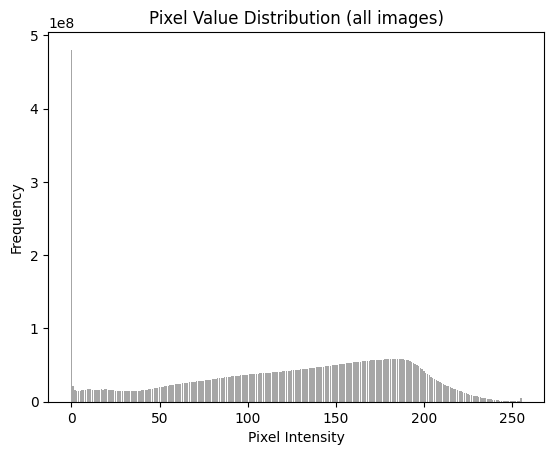

In [13]:
# Create histogram for all values
from tqdm import tqdm 
pixel_values = []

hist = np.zeros(256)
for data_set in [train_path,val_path,test_path]:
    
    for c in tqdm(os.listdir(data_set)):
        folder = os.path.join(data_set,c)
        for im_path in os.listdir(folder):
            final_path = os.path.join(folder,im_path)
            img = Image.open(final_path).convert("L")
            im_array = np.array(img).flatten()
            
            h,_ = np.histogram(im_array,bins=256,range=(0,255))
            hist+=h

plt.bar(range(256), hist, color='gray', alpha=0.7)
plt.title("Pixel Value Distribution (all images)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()
                
